In [212]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler

### GOAL: BASED ON THEIR COLLEGE STATS, PREDICT IF A PLAYER WILL BE PICKED OR NOT IN THE NBA DRAFT.

In [214]:
# Use pandas to read the file as a CSV
df = pd.read_csv('/Users/josebabermejo/Ironhack/5. Quests/nba_rookie_per/CollegeBasketballPlayers2009-2021 2.csv')
df

/var/folders/y6/yy6xx0td03j17rtqbfny6l900000gn/T/ipykernel_11222/3451384194.py:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/josebabermejo/Ironhack/5. Quests/nba_rookie_per/CollegeBasketballPlayers2009-2021 2.csv')


,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,NaN,6.22026
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,NaN,3.94375
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,NaN,10.92680
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,NaN,6.77427
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,NaN,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61056,Trey Patterson,Villanova,BE,2,0.3,60.5,19.3,0.0,0.00,0.0,...,16.018200,0.0000,0.0000,0.0000,0.5000,0.5000,0.0000,0.0000,Pure PG,0.00000
61057,Stavros Polatoglou,Northwestern St.,Slnd,4,1.3,28.3,7.1,0.0,0.00,7.0,...,-4.993820,0.2500,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000,C,0.00000
61058,Sandy Ryan,Tulane,Amer,1,0.1,0.0,0.0,0.0,0.00,0.0,...,-1.126810,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,PF/C,0.00000
61059,Ty Larson,Texas Tech,B12,1,0.1,0.0,0.0,0.0,0.00,0.0,...,-2.380750,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,PF/C,0.00000


In [5]:
cols_to_keep = ['player_name', 'year', 'pick', 'pts', 'ast', 'treb', 'stl', 'blk', 'GP', 'usg', 
                'eFG', 'TS_per', 'FT_per', 'twoP_per','TP_per', 'blk_per','stl_per', 'ast/tov', 'mp']
df_clean = df[cols_to_keep]


In [7]:
df_clean

,player_name,year,pick,pts,ast,treb,stl,blk,GP,usg,eFG,TS_per,FT_per,twoP_per,TP_per,blk_per,stl_per,ast/tov,mp
0,DeAndrae Ross,2009,NaN,3.8846,1.1923,0.8077,0.3462,0.0385,26,16.6,42.5,44.43,0.714,0.382,0.333,0.3,1.5,1.823646,14.5769
1,Pooh Williams,2009,NaN,5.9412,1.8235,1.9412,0.4118,0.2353,34,14.9,52.4,54.48,0.667,0.496,0.392,1.0,1.1,1.631621,24.5294
2,Jesus Verdejo,2009,NaN,12.1852,1.9630,2.9630,0.4815,0.0000,27,21.8,45.7,47.98,0.672,0.427,0.325,0.0,0.9,1.081662,33.1852
3,Mike Hornbuckle,2009,NaN,4.9333,1.1000,2.1333,0.5667,0.1333,30,16.0,53.6,53.69,0.519,0.397,0.452,0.8,1.9,0.942830,17.9667
4,Anthony Brown,2009,NaN,7.5758,0.8485,4.7273,0.4545,0.3333,33,22.0,52.8,54.31,0.561,0.528,0.000,1.9,1.3,0.491229,22.9091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61056,Trey Patterson,2021,NaN,0.0000,0.5000,0.0000,0.5000,0.0000,2,19.3,0.0,0.00,0.000,0.000,0.000,0.0,20.3,NaN,1.5000
61057,Stavros Polatoglou,2021,NaN,0.0000,0.0000,0.2500,0.0000,0.0000,4,7.1,0.0,0.00,0.000,0.000,0.000,0.0,0.0,0.000000,3.7500
61058,Sandy Ryan,2021,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,1,0.0,0.0,0.00,0.000,0.000,0.000,0.0,0.0,NaN,1.0000
61059,Ty Larson,2021,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,1,0.0,0.0,0.00,0.000,0.000,0.000,0.0,0.0,NaN,1.0000


In [9]:
df.isnull().sum()

player_name       0
team              0
conf              0
GP                0
Min_per           0
               ... 
stl              38
blk              38
pts              38
Unnamed: 64    4684
Unnamed: 65      45
Length: 66, dtype: int64

In [11]:
df_clean = df_clean.dropna(subset=['ast/tov'])

In [13]:
# For players with repeated names, keep the rows with a non-null pick. If none have a 'pick', keep the row with the highest year.

def resolve_duplicates(group):
    if len(group) == 1:
        return group  # Keep single entry as is
    has_pick = group.dropna(subset=['pick'])
    if not has_pick.empty:
        return has_pick
    else:
        return group.loc[[group['year'].idxmax()]]

df_resolved = df_clean.groupby('player_name', group_keys=False).apply(resolve_duplicates).reset_index(drop=True)

/var/folders/y6/yy6xx0td03j17rtqbfny6l900000gn/T/ipykernel_11222/103180335.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_resolved = df_clean.groupby('player_name', group_keys=False).apply(resolve_duplicates).reset_index(drop=True)


In [15]:
df_resolved.isnull().sum()

player_name        0
year               0
pick           23271
pts                0
ast                0
treb               0
stl                0
blk                0
GP                 0
usg                0
eFG                0
TS_per             0
FT_per             0
twoP_per           0
TP_per             0
blk_per            0
stl_per            0
ast/tov            0
mp                 0
dtype: int64

#### I want to convert pick to categorical, so I can differentiate if a player was picked or not in the NBA draft, instead of keeping the number these players were picked. 
- Picked = 1
- Not Picked = 0

In [15]:
df_resolved['pick'] = df['pick'].apply(lambda x: 1 if pd.notna(x) else 0)

In [17]:
df_resolved['pick'].value_counts()

pick
0    24004
1      701
Name: count, dtype: int64

In [13]:
df_resolved.columns.tolist()

['player_name',
 'year',
 'pick',
 'pts',
 'ast',
 'treb',
 'stl',
 'blk',
 'GP',
 'usg',
 'eFG',
 'TS_per',
 'FT_per',
 'twoP_per',
 'TP_per',
 'blk_per',
 'stl_per',
 'ast/tov',
 'mp']

### Split train/test

In [19]:
# Separate features and target
features = df_resolved[['pts','ast','treb','stl','blk','GP','usg','TS_per','FT_per','twoP_per','ast/tov','mp', 'eFG', 'blk_per', 'stl_per', 'TP_per']]
target = df_resolved['pick']

# Perform train-test split (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## Trying to visualize feature selection

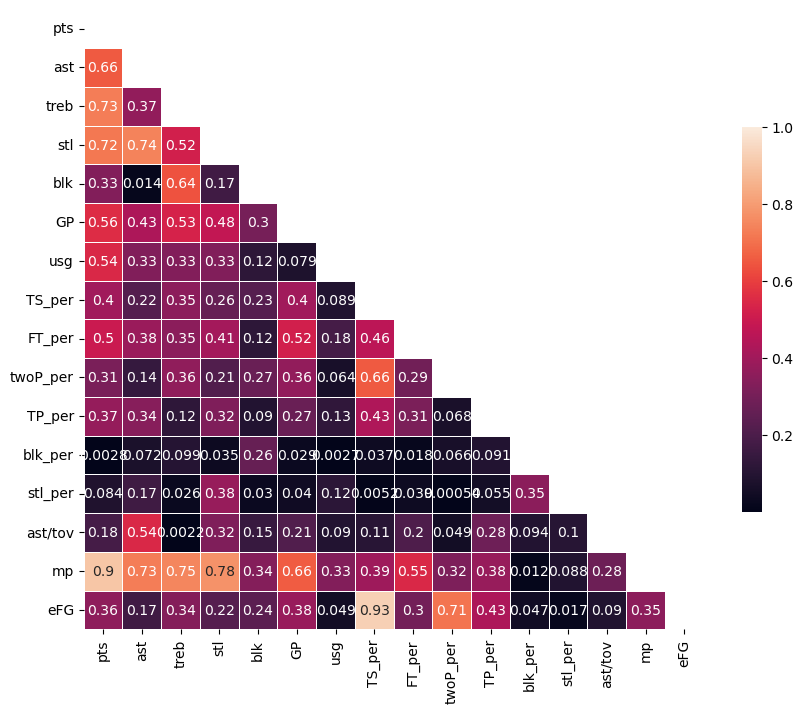

In [16]:
corr=np.abs(features.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [25]:
# adjusting features

features = features.drop(['mp', 'eFG', 'blk_per', 'stl_per', 'TP_per'], axis=1)

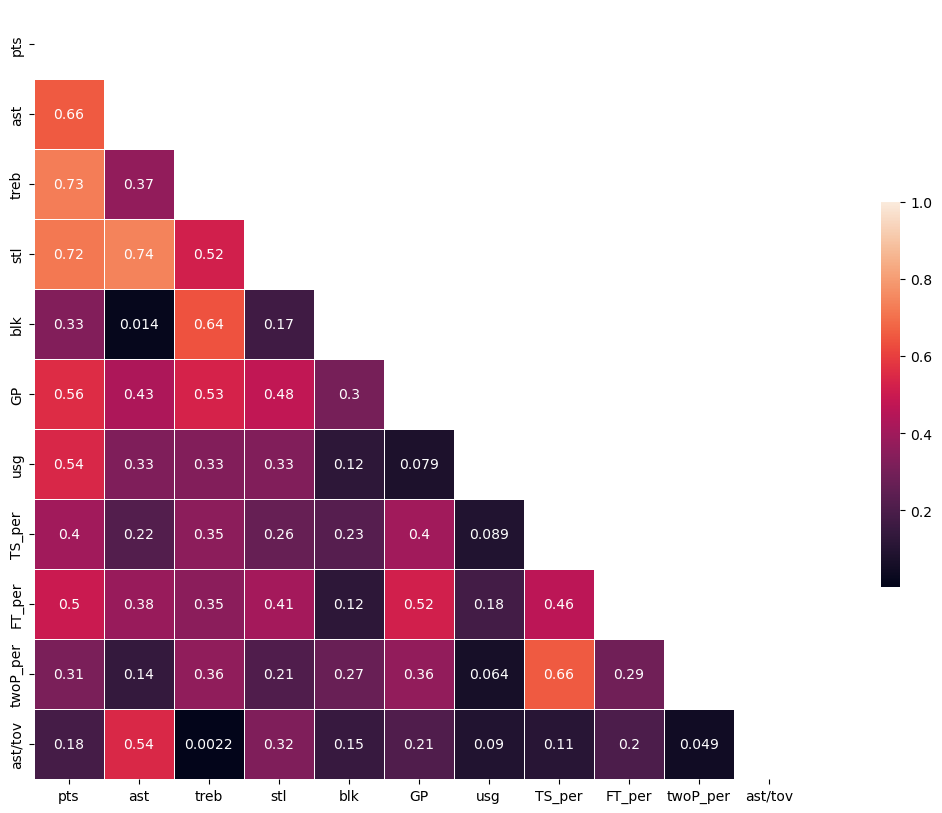

In [18]:
corr=np.abs(features.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

## Scaling



In [21]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

normalizer = MinMaxScaler()

In [23]:
X_train

,pts,ast,treb,stl,blk,GP,usg,TS_per,FT_per,twoP_per,ast/tov,mp,eFG,blk_per,stl_per,TP_per
5802,0.0909,0.0000,0.0909,0.0909,0.0000,11,11.1,14.60,0.333,0.000,0.000000,1.8182,0.0,0.0,3.1,0.000
1608,20.8966,0.9655,13.0690,0.5172,2.0690,29,27.4,57.80,0.570,0.577,0.394355,34.9310,57.1,5.9,0.8,0.250
8248,2.8889,2.0000,2.2963,0.7407,0.1481,27,15.1,43.43,0.542,0.357,1.687479,16.7407,38.8,0.9,2.6,0.364
17182,0.1600,0.4800,0.4000,0.3200,0.0400,22,8.9,12.55,0.500,0.091,1.714286,5.9600,9.1,1.0,3.4,0.000
6678,0.6667,0.1667,0.6667,0.1667,0.0000,6,36.6,57.55,1.000,0.000,0.500150,1.5000,50.0,0.0,7.1,0.333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,0.7826,0.0435,0.4348,0.0435,0.0870,23,16.3,36.85,0.333,0.500,0.333589,3.7391,37.0,2.8,0.7,0.200
5390,4.5455,1.0000,1.9091,0.3636,0.1818,11,18.1,49.36,0.643,0.588,1.374948,14.4545,46.6,1.4,1.4,0.259
860,5.8065,0.2581,3.9677,0.2258,0.6774,31,20.1,50.65,0.658,0.450,0.296326,15.5484,46.2,4.9,0.8,0.667
15795,6.6207,1.2069,1.8621,0.8276,0.1034,25,18.2,55.57,0.711,0.508,1.000000,18.0000,53.0,0.8,2.3,0.366


In [25]:
normalizer.fit(X_train)

MinMaxScaler()

In [27]:
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

## Balacing

### Undersampling

In [29]:
train = pd.DataFrame(X_train_norm, columns=X_train.columns)
train

,pts,ast,treb,stl,blk,GP,usg,TS_per,FT_per,twoP_per,ast/tov,mp,eFG,blk_per,stl_per,TP_per
0,0.003021,0.00000,0.006060,0.023308,0.000000,0.250,0.222,0.097333,0.333,0.000,0.000000,0.045379,0.000000,0.000000,0.026227,0.000
1,0.694449,0.09655,0.871267,0.132615,0.393488,0.700,0.548,0.385333,0.570,0.577,0.035837,0.871821,0.380667,0.005504,0.006768,0.250
2,0.096006,0.20000,0.153087,0.189923,0.028166,0.650,0.302,0.289533,0.542,0.357,0.153349,0.417821,0.258667,0.000840,0.021997,0.364
3,0.005317,0.04800,0.026667,0.082051,0.007607,0.525,0.178,0.083667,0.500,0.091,0.155785,0.148752,0.060667,0.000933,0.028765,0.000
4,0.022156,0.01667,0.044447,0.042744,0.000000,0.125,0.732,0.383667,1.000,0.000,0.045451,0.037438,0.333333,0.000000,0.060068,0.333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19759,0.026008,0.00435,0.028987,0.011154,0.016546,0.550,0.326,0.245667,0.333,0.500,0.030315,0.093322,0.246667,0.002612,0.005922,0.200
19760,0.151059,0.10000,0.127273,0.093231,0.034575,0.250,0.362,0.329067,0.643,0.588,0.124948,0.360761,0.310667,0.001306,0.011844,0.259
19761,0.192965,0.02581,0.264513,0.057897,0.128830,0.750,0.402,0.337667,0.658,0.450,0.026928,0.388063,0.308000,0.004571,0.006768,0.667
19762,0.220023,0.12069,0.124140,0.212205,0.019665,0.600,0.364,0.370467,0.711,0.508,0.090874,0.449251,0.353333,0.000746,0.019459,0.366


In [31]:
train['picked'] = y_train.values

In [33]:
train['picked'].value_counts()

picked
0    19217
1      547
Name: count, dtype: int64

In [35]:
# divide into two dataframes to prepare for the balacing

picked = train[train['picked'] == 1]
not_picked = train[train['picked'] == 0]

In [37]:
from sklearn.utils import resample

In [39]:
not_picked_undersampled = resample(not_picked,
                                    replace=False,
                                    n_samples = len(picked),
                                    random_state=0)
not_picked_undersampled

,pts,ast,treb,stl,blk,GP,usg,TS_per,FT_per,twoP_per,ast/tov,mp,eFG,blk_per,stl_per,TP_per,picked
3525,0.000000,0.00000,0.011113,0.000000,0.000000,0.100,0.000,0.000000,0.000,0.000,0.000000,0.045756,0.000000,0.000000,0.000000,0.000,0
17937,0.047081,0.10833,0.080553,0.085462,0.000000,0.575,0.288,0.256867,0.667,0.300,0.102728,0.275583,0.216000,0.000000,0.015228,0.235,0
2702,0.049849,0.01667,0.044447,0.000000,0.000000,0.100,0.330,0.555533,0.000,0.500,0.090874,0.054077,0.555333,0.000000,0.000000,1.000,0
18452,0.049849,0.01667,0.122220,0.042744,0.031703,0.125,0.320,0.276467,0.500,0.375,0.090874,0.170548,0.250000,0.002425,0.011844,0.000,0
7848,0.099698,0.28710,0.083873,0.190231,0.000000,0.750,0.300,0.330400,0.701,0.385,0.224662,0.397724,0.247333,0.000000,0.021997,0.200,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17114,0.025729,0.00323,0.105373,0.057897,0.067477,0.750,0.206,0.273267,0.444,0.400,0.009099,0.177125,0.266667,0.005784,0.016920,0.000,0
16140,0.139577,0.02000,0.137780,0.102564,0.063388,0.350,0.344,0.421867,0.517,0.667,0.027261,0.284526,0.444667,0.002985,0.016920,0.000,0
13622,0.138627,0.07143,0.175240,0.043949,0.081512,0.825,0.320,0.414267,0.714,0.604,0.090874,0.328026,0.398667,0.003451,0.005922,0.000,0
16206,0.019940,0.02000,0.026667,0.000000,0.000000,0.100,0.448,0.256400,0.750,0.000,0.045437,0.074875,0.000000,0.000000,0.000000,0.000,0


In [41]:
train_sample = pd.concat([not_picked_undersampled, picked])

In [143]:
# Separate features and target
features_sample = train_sample[['pts','ast','treb','stl','blk','GP','usg','TS_per','FT_per','twoP_per','ast/tov', 'mp', 'eFG', 'blk_per', 'stl_per', 'TP_per']]
target_sample = train_sample['picked']

# Perform train-test split (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(features_sample, target_sample, test_size=0.2, random_state=7)

In [ ]:
# Not ideal after doing KNN. Results: 
# Accuracy: 0.7721109087229305
# Precision: 0.023529411764705882
# Recall: 0.15584415584415584
# F1 Score: 0.04088586030664395

## BALACING COMES ONLY AFTER THE TRAIN/TEST SPLIT! CHECK THAT OUT!

### Smote Balancing

In [137]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 1,sampling_strategy=1.0)
X_train_sm,y_train_sm = sm.fit_resample(X_train_norm,y_train)

In [139]:
y_train_sm

0        0
1        0
2        0
3        0
4        0
        ..
38429    1
38430    1
38431    1
38432    1
38433    1
Name: pick, Length: 38434, dtype: int64

In [161]:
# Not ideal after doing KNN. Results: 
# Accuracy: 0.7721109087229305
# Precision: 0.023529411764705882
# Recall: 0.15584415584415584
# F1 Score: 0.04088586030664395

### Over sampling

In [205]:
picked

,pts,ast,treb,stl,blk,GP,usg,TS_per,FT_per,twoP_per,ast/tov,mp,eFG,blk_per,stl_per,TP_per,picked
35,0.498490,0.16154,0.366667,0.364897,0.043894,0.625,0.564,0.357933,0.797,0.476,0.060583,0.744913,0.315333,0.000746,0.023689,0.303,1
131,0.124848,0.09459,0.252253,0.124744,0.020559,0.900,0.290,0.368867,0.446,0.582,0.051297,0.497817,0.384000,0.000653,0.012690,0.000,1
141,0.071576,0.01923,0.130767,0.078897,0.043894,0.600,0.384,0.308400,0.563,0.425,0.018175,0.247665,0.276667,0.002799,0.016920,0.000,1
153,0.567976,0.23636,0.306060,0.198128,0.043229,0.500,0.486,0.379533,0.676,0.567,0.135012,0.857660,0.368667,0.000840,0.011844,0.359,1
273,0.245091,0.20312,0.189587,0.272436,0.029707,0.775,0.294,0.338200,0.747,0.505,0.115814,0.782291,0.304667,0.000560,0.016920,0.271,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19661,0.256367,0.10714,0.219047,0.183154,0.081512,0.225,0.382,0.327733,0.429,0.536,0.071743,0.452817,0.333333,0.001119,0.010998,0.300,1
19670,0.204145,0.13929,0.250000,0.183154,0.101881,0.675,0.376,0.330867,0.592,0.478,0.104240,0.510756,0.318000,0.002705,0.017766,0.314,1
19682,0.039274,0.06364,0.072727,0.023308,0.000000,0.250,0.496,0.311733,0.750,0.500,0.070683,0.111177,0.278000,0.000000,0.009306,0.000,1
19722,0.000000,0.01111,0.000000,0.028487,0.000000,0.200,0.752,0.000000,0.000,0.000,0.045437,0.027731,0.000000,0.000000,0.051607,0.000,1


In [207]:
not_picked

,pts,ast,treb,stl,blk,GP,usg,TS_per,FT_per,twoP_per,ast/tov,mp,eFG,blk_per,stl_per,TP_per,picked
0,0.003021,0.00000,0.006060,0.023308,0.000000,0.250,0.222,0.097333,0.333,0.000,0.000000,0.045379,0.000000,0.000000,0.026227,0.000,0
1,0.694449,0.09655,0.871267,0.132615,0.393488,0.700,0.548,0.385333,0.570,0.577,0.035837,0.871821,0.380667,0.005504,0.006768,0.250,0
2,0.096006,0.20000,0.153087,0.189923,0.028166,0.650,0.302,0.289533,0.542,0.357,0.153349,0.417821,0.258667,0.000840,0.021997,0.364,0
3,0.005317,0.04800,0.026667,0.082051,0.007607,0.525,0.178,0.083667,0.500,0.091,0.155785,0.148752,0.060667,0.000933,0.028765,0.000,0
4,0.022156,0.01667,0.044447,0.042744,0.000000,0.125,0.732,0.383667,1.000,0.000,0.045451,0.037438,0.333333,0.000000,0.060068,0.333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19759,0.026008,0.00435,0.028987,0.011154,0.016546,0.550,0.326,0.245667,0.333,0.500,0.030315,0.093322,0.246667,0.002612,0.005922,0.200,0
19760,0.151059,0.10000,0.127273,0.093231,0.034575,0.250,0.362,0.329067,0.643,0.588,0.124948,0.360761,0.310667,0.001306,0.011844,0.259,0
19761,0.192965,0.02581,0.264513,0.057897,0.128830,0.750,0.402,0.337667,0.658,0.450,0.026928,0.388063,0.308000,0.004571,0.006768,0.667,0
19762,0.220023,0.12069,0.124140,0.212205,0.019665,0.600,0.364,0.370467,0.711,0.508,0.090874,0.449251,0.353333,0.000746,0.019459,0.366,0


In [153]:
picked_oversampled = resample(picked,
                                    replace=True,
                                    n_samples = len(not_picked),
                                    random_state=0)
picked_oversampled

,pts,ast,treb,stl,blk,GP,usg,TS_per,FT_per,twoP_per,ast/tov,mp,eFG,blk_per,stl_per,TP_per,picked
6524,0.071214,0.00952,0.098413,0.000000,0.036230,0.500,0.546,0.339533,0.385,0.526,0.025956,0.123604,0.350667,0.003918,0.000000,0.000,1
11883,0.039274,0.10909,0.042427,0.069923,0.034575,0.225,0.216,0.476200,0.000,0.667,0.218118,0.172440,0.476000,0.002052,0.019459,0.500,1
384,0.267141,0.15385,0.356413,0.197231,0.029250,0.625,0.376,0.351200,0.667,0.516,0.063773,0.658517,0.329333,0.000560,0.014382,0.100,1
9130,0.533799,0.25000,0.275000,0.408667,0.065385,0.775,0.428,0.388400,0.726,0.515,0.106911,0.874322,0.360667,0.000933,0.021997,0.443,1
2625,0.449827,0.14643,0.511907,0.192308,0.095091,0.675,0.552,0.360000,0.718,0.500,0.071653,0.691704,0.331333,0.001959,0.014382,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11728,0.230412,0.31333,0.148887,0.153846,0.076073,0.675,0.400,0.352667,0.771,0.467,0.117017,0.612311,0.311333,0.001679,0.012690,0.311,1
13567,0.066465,0.00000,0.100000,0.000000,0.019018,0.150,0.328,0.259267,0.000,0.500,0.000000,0.147254,0.259333,0.002705,0.000000,0.200,1
7599,0.690288,0.33143,0.240000,0.219769,0.027177,0.850,0.526,0.404867,0.830,0.533,0.109805,0.898502,0.376000,0.000373,0.011844,0.409,1
19221,0.504029,0.12667,0.482220,0.222231,0.126795,0.725,0.494,0.337600,0.627,0.456,0.050048,0.811147,0.318667,0.001959,0.012690,0.380,1


In [155]:
train_o_sample = pd.concat([picked_oversampled, not_picked])

In [157]:
# Separate features and target
features_o_sample = train_o_sample[['pts','ast','treb','stl','blk','GP','usg','TS_per','FT_per','twoP_per','ast/tov', 'mp', 'eFG', 'blk_per', 'stl_per', 'TP_per']]
target_o_sample = train_o_sample['picked']

# Perform train-test split (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(features_o_sample, target_o_sample, test_size=0.2, random_state=7)

In [201]:
y_train

8067     1
10896    0
7668     1
5253     1
4852     1
        ..
3348     1
15355    0
7542     1
4959     1
17382    1
Name: picked, Length: 30747, dtype: int64

In [203]:
X_train.duplicated().sum()

14885

## KNN

In [81]:
# Classifier because my target column is categorical

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [159]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [161]:
knn.score(X_test, y_test)

0.9519968778457135

In [163]:
y_pred_knn = knn.predict(X_test)

#### KNN Confusion Matrix

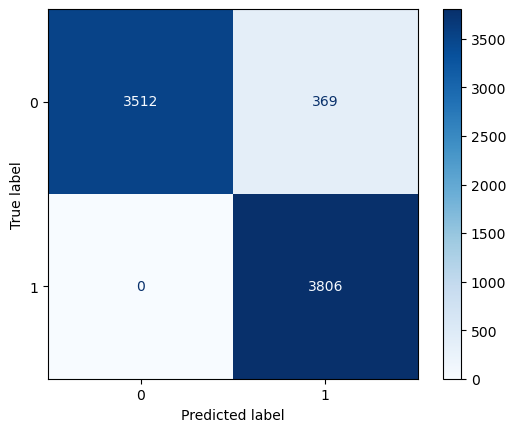

In [165]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

#### KNN Metrics

In [167]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9519968778457135
Precision: 0.9116167664670659
Recall: 1.0
F1 Score: 0.953765192331788


## Logistic Regression

In [169]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [171]:
log_reg.score(X_test, y_test)

0.5471575387017041

In [173]:
y_pred_log = log_reg.predict(X_test)

#### Logistic Regression Confusion Matrix

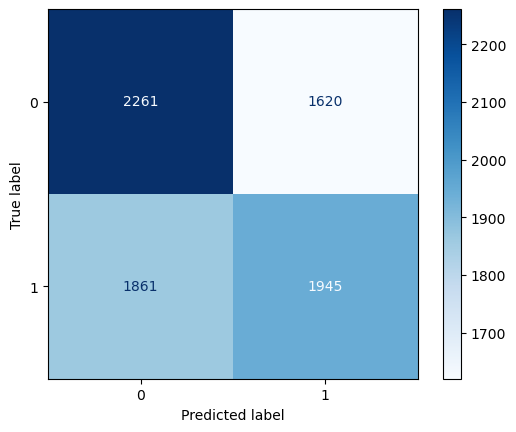

In [175]:
cm = confusion_matrix(y_test, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

#### Logistic Regression Metrics

In [177]:
accuracy = accuracy_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log)
recall = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.5471575387017041
Precision: 0.5455820476858345
Recall: 0.5110352075669995
F1 Score: 0.5277438610771944


## Decision Tree

In [179]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [181]:
dt.score(X_test, y_test)

0.546246910368154

In [183]:
y_pred_dt = dt.predict(X_test)

#### Decision Tree Confusion Matrix

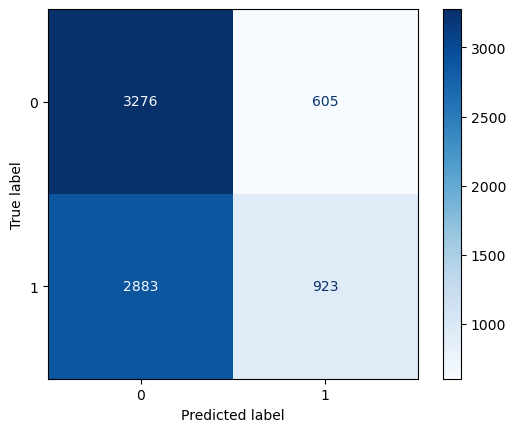

In [185]:
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

#### Decision Tree Metrics

In [187]:
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.546246910368154
Precision: 0.6040575916230366
Recall: 0.24251182343667893
F1 Score: 0.3460817397825272


## Random Forest

In [189]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [191]:
rf.score(X_test, y_test)

0.999479640952257

In [193]:
y_pred_rf = rf.predict(X_test)

#### Random Forest Confusion Matrix

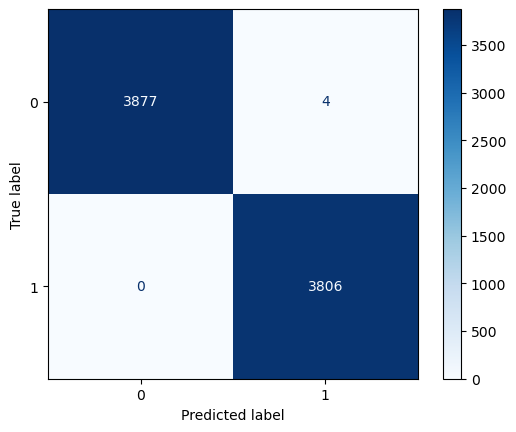

In [195]:
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

#### Random Forest Metrics

In [197]:
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.999479640952257
Precision: 0.9989501312335958
Recall: 1.0
F1 Score: 0.9994747899159664


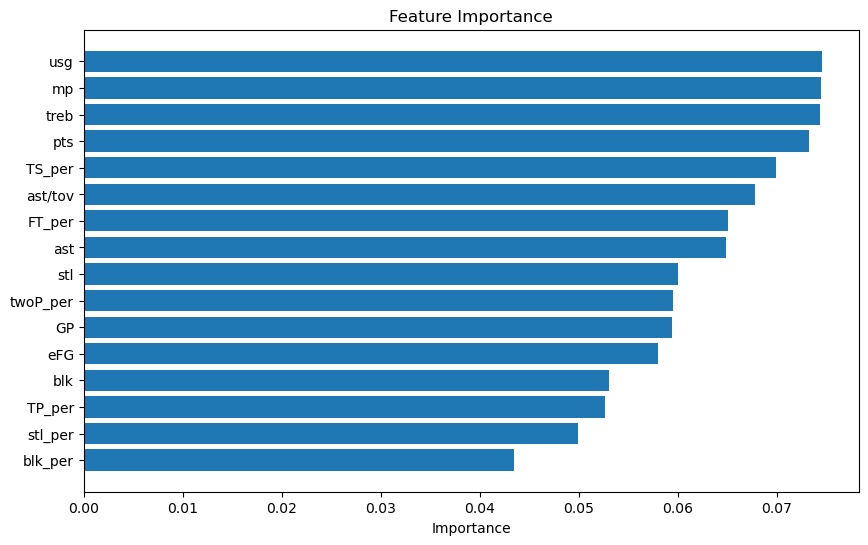

In [209]:
import matplotlib.pyplot as plt

# Assuming rf is your trained RandomForestClassifier
importances = rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Optional: plot it
plt.figure(figsize=(10, 6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()